# Proyek Klasifikasi Gambar: Vegetable Image Dataset
- **Nama:** I Gede Agus Subawa
- **Email:** subawa116@gmail.com
- **ID Dicoding:** gedeaguss

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"igedeagus","key":"21ab2b38250452d0b99eeebb0f57b4ef"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Data Preparation

### Data Loading

In [ ]:
#!/bin/bash
!kaggle datasets download misrakahmed/vegetable-image-dataset
!unzip "/content/vegetable-image-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

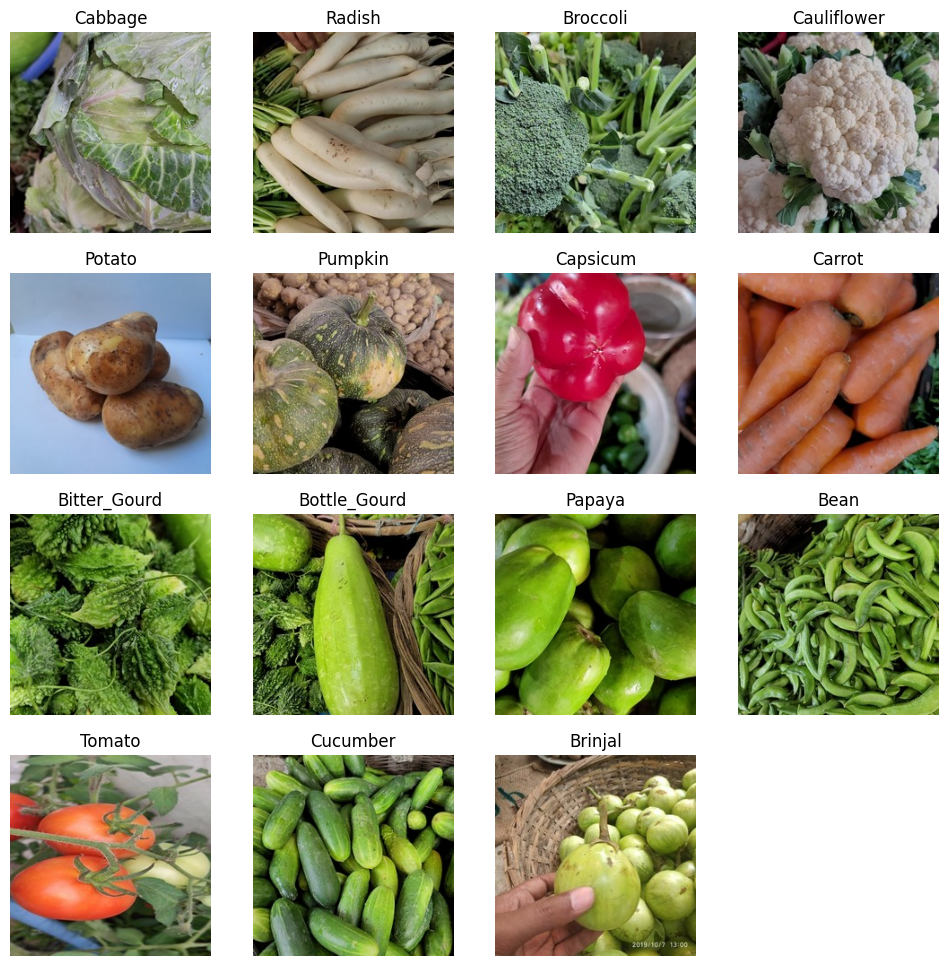

In [ ]:
image_categories = os.listdir('/content/Vegetable Images/train')
def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Let's plot a few images
train_path = "/content/Vegetable Images/train"
validation_path = "/content/Vegetable Images/validation"
test_path = "/content/Vegetable Images/test"

image_categories = os.listdir('/content/Vegetable Images/train')

In [ ]:
num_classes = 15
hidden_size_1 = 1024
hidden_size_2 = 256

### Data Preprocessing

In [ ]:
# Creating Image Data Generator for train, validation, and test set

# 1. Train Set (Dengan Augmentasi Data untuk Mengurangi Overfitting)
train_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_image_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 2. Validation Set (Hanya Normalisasi)
val_gen = ImageDataGenerator(rescale=1.0/255.0)
val_image_generator = val_gen.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 3. Test Set (Hanya Normalisasi, tanpa augmentasi, dan shuffle=False agar urutannya tidak acak)
test_gen = ImageDataGenerator(rescale=1.0/255.0)
test_image_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
class_map

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

## Modelling

In [ ]:
tf.keras.backend.clear_session()
# Load model MobileNetV2 tanpa lapisan top (klasifikasi akhir)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Membekukan lapisan-lapisan dari model pre-trained
base_model.trainable = False

# Menambahkan lapisan baru
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(15, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-6)

# Melatih Model
history = model.fit(
    train_image_generator,
    validation_data=val_image_generator,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 213ms/step - accuracy: 0.4961 - loss: 1.6941 - val_accuracy: 0.9587 - val_loss: 0.1791 - learning_rate: 1.0000e-04
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 194ms/step - accuracy: 0.8934 - loss: 0.3526 - val_accuracy: 0.9787 - val_loss: 0.0923 - learning_rate: 1.0000e-04
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - accuracy: 0.9334 - loss: 0.2212 - val_accuracy: 0.9850 - val_loss: 0.0638 - learning_rate: 1.0000e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 193ms/step - accuracy: 0.9485 - loss: 0.1711 - val_accuracy: 0.9893 - val_loss: 0.0508 - learning_rate: 1.0000e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.9587 - loss: 0.1355 - val_accuracy: 0.9920 - val_loss: 0.0392 - learning_rate: 1.0000e-04


In [ ]:
# Prediksi dengan Test Set
test_loss, test_acc = model.evaluate(test_image_generator)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9897 - loss: 0.0388

Test Accuracy: 98.73%


## Evaluasi dan Visualisasi

In [ ]:
# Mendapatkan prediksi label
y_pred = model.predict(test_image_generator)
y_pred_classes = y_pred.argmax(axis=1)

# Laporan Klasifikasi
print(classification_report(test_image_generator.classes, y_pred_classes, target_names=test_image_generator.class_indices.keys()))

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       0.99      0.98      0.99       200
Bottle_Gourd       0.99      0.99      0.99       200
     Brinjal       0.94      0.98      0.96       200
    Broccoli       0.99      0.99      0.99       200
     Cabbage       1.00      0.99      1.00       200
    Capsicum       0.99      0.98      0.99       200
      Carrot       0.99      0.99      0.99       200
 Cauliflower       0.99      0.98      0.99       200
    Cucumber       0.98      0.99      0.99       200
      Papaya       0.97      0.94      0.96       200
      Potato       0.99      1.00      1.00       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       0.99      0.98      0.99       200
      Tomato       0.99      0.98      0.99       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      

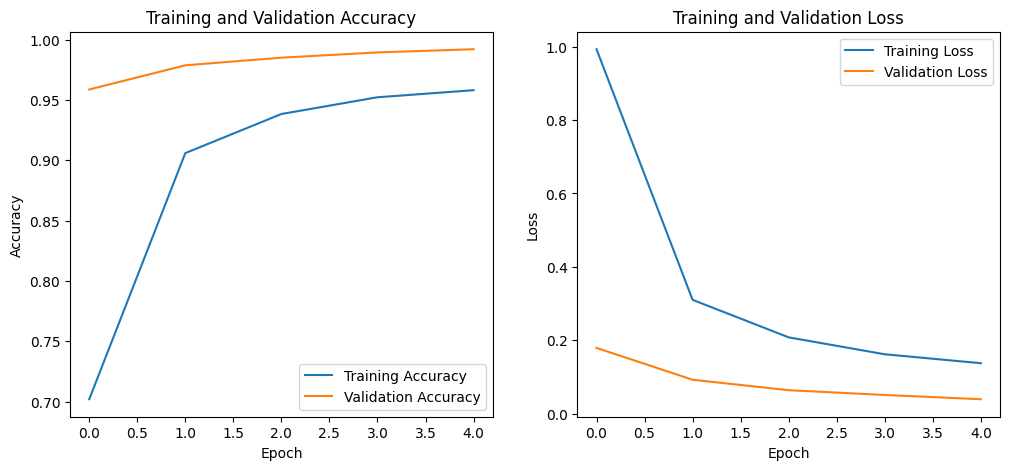

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Konversi Model

In [ ]:
# Menyimpan model ke dalam format SavedModel
model.export('model_savedmodel')

Saved artifact at 'model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139982714626000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714626192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714629456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714629072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714627920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714629648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714628688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714621584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714629840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714627344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139982714

In [ ]:
model.save('model_inceptionV3_epoch5.h5')

In [ ]:
import pathlib
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

204180

In [ ]:
model.save("model.h5")
# Install tensorflowjs
!pip install tensorflowjs
# mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-03-17 04:11:46.218466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742184706.267419   11454 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742184706.278510   11454 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742184706.313538   11454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742184706.313598   11454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742184706.313609   11454 computation_placer.cc:177] computation placer alr

# Inference


Saving cabbage_0_5-240.jpeg to cabbage_0_5-240 (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


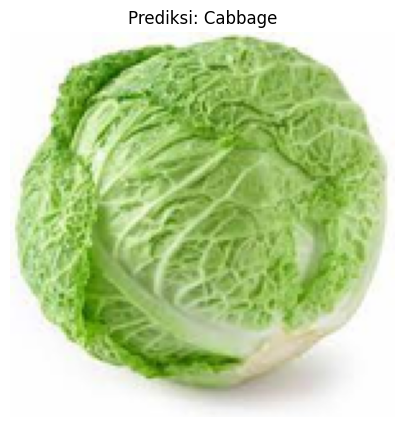

In [ ]:
from PIL import Image

# Muat model yang sudah disimpan
loaded_model = tf.keras.models.load_model('/content/model_inceptionV3_epoch5.h5')

# Label mapping dari angka ke nama sayuran
label_mapping = {
    0: 'Bean',
    1: 'Bitter_Gourd',
    2: 'Bottle_Gourd',
    3: 'Brinjal',
    4: 'Broccoli',
    5: 'Cabbage',
    6: 'Capsicum',
    7: 'Carrot',
    8: 'Cauliflower',
    9: 'Cucumber',
    10: 'Papaya',
    11: 'Potato',
    12: 'Pumpkin',
    13: 'Radish',
    14: 'Tomato'
}


# Unggah gambar dari lokal
uploaded = files.upload()

# Mendapatkan nama file yang diupload
image_path = list(uploaded.keys())[0]

# Membaca dan mengubah ukuran gambar agar sesuai dengan model
image = Image.open(image_path)
image = image.resize((150, 150))  # Ubah ukuran menjadi 150x150

# Normalisasi nilai piksel menjadi [0, 1]
image_array = np.array(image) / 255.0

# Tambahkan dimensi agar menjadi (1, 150, 150, 3)
image_array = np.expand_dims(image_array, axis=0)

# Melakukan prediksi menggunakan model yang sudah diload
predictions = loaded_model.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_mapping[predicted_class]


# Menampilkan gambar yang diunggah beserta hasil prediksi
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')
plt.show()